Libraries imported successfully!
Data loaded: (22524, 6)
Cleaning text data...
After cleaning: (22524, 7)
Performing sentiment analysis...

Sentiment Distribution:
neutral: 11283 (50.09%)
positive: 8501 (37.74%)
negative: 2740 (12.16%)

First few results:
                                        cleaned_text sentiment  polarity
0  what are we drinking today  \n \n \n \n\nworldcup   neutral  0.000000
1  amazing   worldcup launch video shows how much...  positive  0.231250
2              worth reading while watching worldcup  positive  0.300000
3  golden maknae shinning bright\n\n\njeonjungkoo...  positive  0.500000
4  if the bbc cares so much about human rights ho...   neutral  0.100000
5  and like will the mexican fans be able to scre...  positive  0.250000
6  look like a only me and the jamaican football ...   neutral  0.000000
7  really? football on a monday morning at  and  ...  positive  0.200000
8  as the world cup starts in qatar its black awa...  negative -0.166667
9  worldcup  a

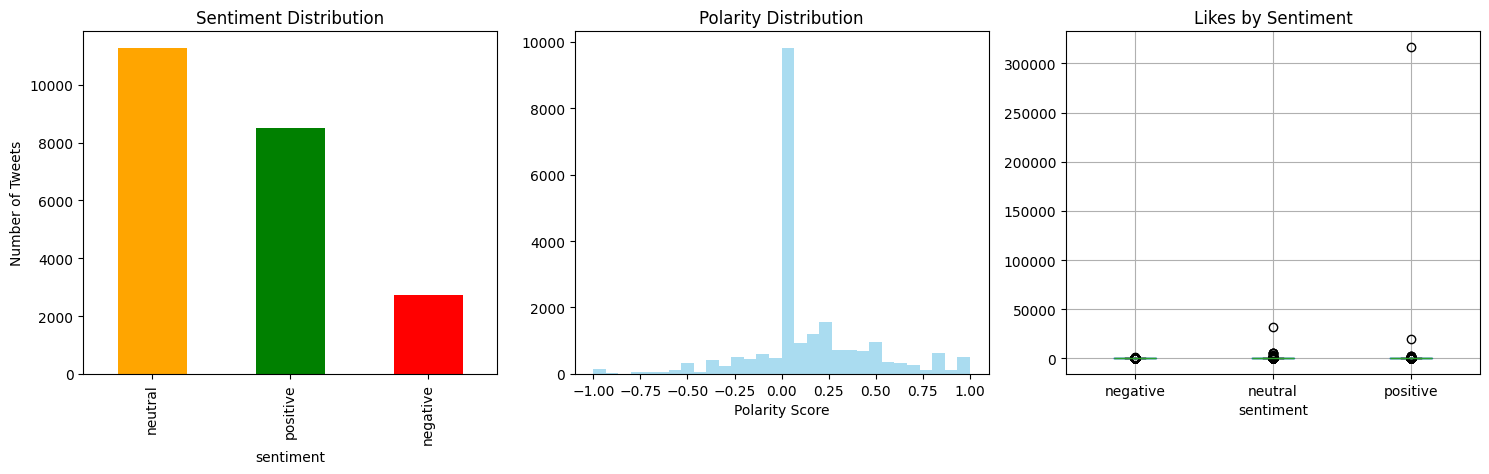

🎉 Analysis completed successfully!


In [22]:
# Football Sentiment Analysis - COMPLETE WORKING VERSION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob

print("Libraries imported successfully!")

# Load data
file_path = "../data/raw/fifa_world_cup_2022_tweets.csv"
df_raw = pd.read_csv(file_path)
print(f"Data loaded: {df_raw.shape}")

# Simple text cleaning function
def clean_tweet(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtag symbol but keep text
    text = re.sub(r'[^a-zA-Z\s!?]', '', text)  # Keep only letters and basic punctuation
    return text.strip()

# Apply cleaning
print("Cleaning text data...")
df = df_raw.copy()
df['cleaned_text'] = df['Tweet'].apply(clean_tweet)

# Remove empty tweets
df = df[df['cleaned_text'].str.len() > 10]  # Keep only tweets with meaningful content
print(f"After cleaning: {df.shape}")

# Sentiment analysis
print("Performing sentiment analysis...")

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
df['polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Show results
print("\nSentiment Distribution:")
sentiment_counts = df['sentiment'].value_counts()
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{sentiment}: {count} ({percentage:.2f}%)")

print("\nFirst few results:")
print(df[['cleaned_text', 'sentiment', 'polarity']].head(10))

# Team analysis
team_keywords = {
    'Argentina': ['argentina', 'messi', 'arg', 'albiceleste'],
    'France': ['france', 'mbappe', 'fra', 'les bleus'],
    'Brazil': ['brazil', 'neymar', 'bra', 'brasil'],
    'Portugal': ['portugal', 'ronaldo', 'por', 'cr7'],
    'England': ['england', 'kane', 'eng', 'three lions'],
    'Germany': ['germany', 'ger', 'deutschland'],
    'Spain': ['spain', 'esp', 'espana'],
    'Netherlands': ['netherlands', 'ned', 'holland', 'dutch']
}

print("\nTeam Sentiment Analysis:")
for team, keywords in team_keywords.items():
    pattern = '|'.join(keywords)
    team_tweets = df[df['cleaned_text'].str.contains(pattern, case=False, na=False)]
    
    if len(team_tweets) > 0:
        sentiment_dist = team_tweets['sentiment'].value_counts(normalize=True) * 100
        avg_polarity = team_tweets['polarity'].mean()
        
        print(f"\n{team}:")
        print(f"  Total tweets: {len(team_tweets)}")
        print(f"  Average polarity: {avg_polarity:.3f}")
        for sentiment, percentage in sentiment_dist.items():
            print(f"  {sentiment}: {percentage:.1f}%")

# Basic visualization
print("\nCreating visualizations...")
plt.figure(figsize=(15, 5))

# Sentiment distribution
plt.subplot(1, 3, 1)
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'orange'}
df['sentiment'].value_counts().plot(kind='bar', color=[colors.get(x, 'blue') for x in df['sentiment'].value_counts().index])
plt.title('Sentiment Distribution')
plt.ylabel('Number of Tweets')

# Polarity distribution
plt.subplot(1, 3, 2)
plt.hist(df['polarity'], bins=30, alpha=0.7, color='skyblue')
plt.title('Polarity Distribution')
plt.xlabel('Polarity Score')

# Likes by sentiment
plt.subplot(1, 3, 3)
df.boxplot(column='Number of Likes', by='sentiment', ax=plt.gca())
plt.title('Likes by Sentiment')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

print("🎉 Analysis completed successfully!")